## objective

The objective of the project is - using historical usage patterns and weather data, forecast(predict) bike rental demand (number of bike users (‘cnt’)) on hourly basis.

Use the provided “Bikes Rental” data set to predict the bike demand (bike users count - 'cnt') using various best possible models (ML algorithms). Also, report the model that performs best, fine-tune the same model using one of the model fine-tuning techniques, and report the best possible combination of hyperparameters for the selected model. Lastly, use the selected model to make final predictions and compare the predicted values with the actual values.

Below are the details of the features list for the given Bikes data set:

instant: record index

dteday : date

season: season (1: springer, 2: summer, 3: fall, 4: winter)

yr: year (0: 2011, 1:2012)

mnth: month (1 to 12)

hr: hour (0 to 23)

holiday: whether the day is a holiday or not

weekday: day of the week

workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

weathersit:

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: Normalized temperature in Celsius. The values are derived via (tt_min)/(t_maxt_min), t_min=*8, t_max=+39 (only in hourly scale)

atemp: Normalized feeling temperature in Celsius. The values are derived via (tt_min)/(t_maxt_min), t_min=*16, t_max=+50 (only in hourly scale)

hum: Normalized humidity. The values are divided to 100 (max)

windspeed: Normalized wind speed. The values are divided to 67 (max)

casual: count of casual users

registered: count of registered users

cnt: count of total rental bikes including both casual and registered users


The "target" data set ('y') should have only one 'label' i.e. 'cnt'.


## steps for training ML model

importing the libraries

Using some pre-defined utility functions

Loading the data

Cleaning the data

Dividing the dataset into training and test dataset

using train_test_split in the ratio 70:30
Training several models and analyzing their performance to select a model

Fine-tuning the model by finding the best hyper-parameters and features

Evaluating selected model using test dataset



In [1]:
#import the standard libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
np.random.seed(42)

In [4]:
#load the data

In [5]:
filePath = "/cxldata/datasets/project/bikes.csv"
bikesData = pd.read_csv(filePath)
bikesData.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## EDA

In [6]:
#check the metadata
bikesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
bikesData['weathersit'].value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

In [8]:
len(bikesData.columns)

17

In [9]:
bikesData['yr'].unique()

array([0, 1])

In [10]:
bikesData['hum'].describe()

count    17379.000000
mean         0.627229
std          0.192930
min          0.000000
25%          0.480000
50%          0.630000
75%          0.780000
max          1.000000
Name: hum, dtype: float64

In [11]:
#drop unwanted features

In [12]:
columnsToDrop = ['instant','casual','registered','atemp','dteday']
bikesData = bikesData.drop(columnsToDrop,axis=1)

## pre-processing the data

In [13]:
bikesData['dayCount'] = pd.Series(range(bikesData.shape[0]))/24

In [14]:
train_set,test_set = train_test_split(bikesData,test_size=0.3,
                                      random_state=42)

In [15]:
train_set.shape,test_set.shape

((12165, 13), (5214, 13))

In [16]:
train_set.sort_values('dayCount',axis=0,inplace=True)
test_set.sort_values('dayCount',axis=0,inplace=True)

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [18]:
#scaling the data

In [19]:
columnsToScale = ['temp','hum','windspeed']
scaler = StandardScaler()
train_set[columnsToScale] = scaler.fit_transform(train_set[columnsToScale])
test_set[columnsToScale] = scaler.transform(test_set[columnsToScale])

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [20]:
print("mean:",train_set[columnsToScale].mean())
print("std:",train_set[columnsToScale].std())

mean: temp         1.658955e-15
hum          4.775031e-17
windspeed   -1.367550e-15
dtype: float64
std: temp         1.000041
hum          1.000041
windspeed    1.000041
dtype: float64


## train the models

### decision tree models

In [21]:
trainingCols = train_set.drop('cnt',axis=1)
trainingLabels = train_set['cnt'].copy()

In [22]:
dec_reg = DecisionTreeRegressor()

In [23]:
#get the cross validation scores
dt_mae_scores = -cross_val_score(dec_reg,X=trainingCols,y=trainingLabels,
               cv=10,scoring='neg_mean_absolute_error')

In [24]:
display_scores(dt_mae_scores)

Scores: [42.94494659 49.17912901 35.97206245 44.15365653 47.18077239 76.44407895
 57.19243421 47.65460526 51.91118421 96.50493421]
Mean: 54.91378038100593
Standard deviation: 17.235976527039966


In [25]:
dt_mse_scores = np.sqrt(-cross_val_score(dec_reg,X=trainingCols,y=trainingLabels,
               cv=10,scoring='neg_mean_squared_error'))

In [26]:
display_scores(dt_mse_scores)

Scores: [ 68.75164598  77.89787997  55.2053982   73.8702865   74.08938837
 114.72476001  96.05004435  81.67842009  89.91412661 149.54903152]
Mean: 88.17309816096285
Standard deviation: 25.596518717701052


### linear regression models

In [27]:
lin_reg = LinearRegression()

In [28]:
#get the cross validation scores
lr_mae_scores = -cross_val_score(lin_reg,X=trainingCols,y=trainingLabels,
               cv=10,scoring='neg_mean_absolute_error')

In [29]:
display_scores(lr_mae_scores)

Scores: [ 66.96340699  80.48809095 113.84704981  93.17230086  76.11197672
  96.5220689  133.13798218 158.02254734 158.90195479 127.15674717]
Mean: 110.43241256942255
Standard deviation: 31.426965705295334


In [30]:
#get the cross validation scores
lr_mse_scores = np.sqrt(-cross_val_score(lin_reg,X=trainingCols,y=trainingLabels,
               cv=10,scoring='neg_mean_squared_error'))

In [31]:
display_scores(lr_mse_scores)

Scores: [ 84.63836676 111.12038541 131.88324414 119.16350622 105.17621319
 127.72562924 174.97188817 187.31691741 205.60028279 164.30585678]
Mean: 141.19022901181802
Standard deviation: 37.55565075919532


### Random Forest models

In [32]:
forest_reg = RandomForestRegressor(n_estimators=150)

In [33]:
#get the cross validation scores
rf_mae_scores = -cross_val_score(forest_reg,X=trainingCols,y=trainingLabels,
               cv=10,scoring='neg_mean_absolute_error')

In [34]:
display_scores(rf_mae_scores)

Scores: [33.38462339 33.69033689 28.88828814 32.1964229  35.8831553  56.81334978
 41.36110746 40.84827851 37.86643092 85.56827303]
Mean: 42.650026631582556
Standard deviation: 16.06531529550186


In [35]:
#get the cross validation scores
rf_mse_scores = np.sqrt(-cross_val_score(forest_reg,X=trainingCols,y=trainingLabels,
               cv=10,scoring='neg_mean_squared_error'))

In [36]:
display_scores(rf_mse_scores)

Scores: [ 45.94600012  52.92736638  43.71822258  52.68355139  60.54681005
  94.10811061  67.14699936  65.98975243  61.4813098  132.26134176]
Mean: 67.68094644526167
Standard deviation: 25.398246216439414


In [37]:
#xgboost regressor

In [38]:
xgb_reg = XGBRegressor(n_estimators=150)

In [39]:
#get the cross validation scores
xg_mae_scores = -cross_val_score(xgb_reg,X=trainingCols,y=trainingLabels,
               cv=10,scoring='neg_mean_absolute_error')

In [40]:
display_scores(xg_mae_scores)

Scores: [40.8897685  37.41368315 32.00081296 36.45436919 36.40858581 42.29172479
 57.38968765 62.25236394 80.80982443 80.568133  ]
Mean: 50.647895342643224
Standard deviation: 17.541940722371656


In [41]:
#get the cross validation scores
xgb_mse_scores = np.sqrt(-cross_val_score(xgb_reg,X=trainingCols,y=trainingLabels,
               cv=10,scoring='neg_mean_squared_error'))

In [42]:
display_scores(xgb_mse_scores)

Scores: [ 58.19165618  53.9003251   43.68640183  53.55143159  54.20227495
  64.48734114  78.81126155  84.4834186  108.34647434 117.05385702]
Mean: 71.67144422960607
Standard deviation: 23.633753262505156


choose the xgboost regressor since the mean of rmse score is low

## Fine-Tune the model

In [43]:
param_grid = [
    {'n_estimators': [120, 150],
    'max_depth':[15,28]},
]

In [44]:
grid_search = GridSearchCV(xgb_reg,param_grid=param_grid,
                          cv=5,scoring='neg_mean_squared_error')

In [45]:
grid_search.fit(trainingCols,trainingLabels)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bytree=1,
                                    gamma=0, learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=150, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=True,
                                    subsample=1),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [15, 28], 'n_estimators': [120, 150]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [46]:
grid_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=None, n_estimators=120,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

In [47]:
grid_search.best_params_

{'max_depth': 15, 'n_estimators': 120}

In [48]:
#get the important features from the data
feature_importances = grid_search.best_estimator_.feature_importances_

In [49]:
print(feature_importances)

[0.05655751 0.00777795 0.07957543 0.12658305 0.00948463 0.09819099
 0.00802176 0.04291091 0.13875993 0.14094736 0.11003818 0.1811523 ]


## evaluate the model

In [50]:
final_model = grid_search.best_estimator_

In [51]:
test_set.sort_values('dayCount',axis=0,inplace=True)

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
#drop the 'cnt' column and store the remaining values in test_x_cols
test_x_cols = (test_set.drop('cnt',axis=1)).columns.values
test_x_cols

array(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'dayCount'], dtype=object)

In [53]:
test_y_cols = 'cnt'

In [54]:
X_test = test_set.loc[:,test_x_cols]
y_test = test_set.loc[:,test_y_cols]

In [55]:
## final predictions

In [56]:
test_set.loc[:,'predictedCounts_test'] = final_model.predict(X_test)

/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [57]:
mse = mean_squared_error(y_test,test_set.loc[:,'predictedCounts_test'])

In [58]:
final_mse = np.sqrt(mse)
final_mse

40.14481681636181

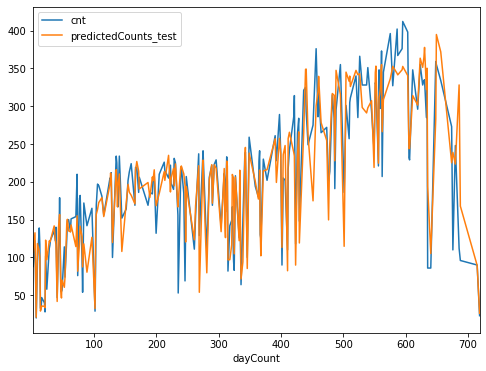

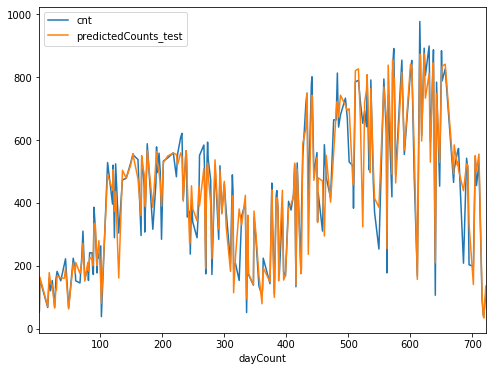

In [60]:
times = [9,18]
for time in times:
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()
    test_set_freg_time = test_set[test_set.hr == time]
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'cnt', ax = ax)
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'predictedCounts_test', ax =ax)
    plt.show()